In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpcful packages to load
import os 
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import csv
import cv2
import math
import PIL
from collections import namedtuple, OrderedDict
import io
from PIL import Image
from collections import namedtuple, OrderedDict

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
DATA_DIR = './detect/' 
ROOT_DIR = './detect/output'
os.chdir(ROOT_DIR)

# Tensorflow Object Detection API setup

In [4]:
# !pip uninstall -y tensorflow
# !pip uninstall -y tensorflow-gpu
# !pip uninstall -y tensorflow-estimator

Found existing installation: tensorflow-estimator 1.15.0
Uninstalling tensorflow-estimator-1.15.0:
  Successfully uninstalled tensorflow-estimator-1.15.0


In [7]:
# #Change TF version
# #!pip list | grep tensorflow
# !pip install tensorflow-gpu==1.15
# # !pip uninstall -y tensorflow==2.2
# # !pip list | grep tensorflow
# !pip install tensorflow-estimator==1.15.1
# #!pip list | grep tensorflow

^C
  Using cached tensorflow_estimator-1.15.0-py2.py3-none-any.whl (503 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-gpu 1.15.0 requires tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.15.0 which is incompatible.


In [8]:
import os
os.getcwd()

'D:\\Shodor\\project\\xray\\Modules\\Alignment\\ship\\detect\\output'

In [9]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [10]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18268469683596300942
]


In [11]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

False

In [22]:
# !pip install tensorflow-object-detection-api==0.1.0 --no-dependencies

     |████████████████████████████████| 577 kB 561 kB/s eta 0:00:01
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1-py3-none-any.whl size=844493 sha256=7bfdd08c4103fa0ab98bbf880f1138a3a578a3f900adc8467fcbdd1aae5d99be
  Stored in directory: /root/.cache/pip/wheels/3f/f7/74/e6ca6c76fa282d374389ae8499912b17718977260db380650d
Successfully built tensorflow-object-detection-api
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [23]:
os.chdir(ROOT_DIR)
# !git clone https://github.com/tensorflow/models.git
#!git clone https://github.com/tensorflow/models/archive/v2.2.0.zip
# !wget  https://github.com/tensorflow/models/archive/v2.2.0.zip

Cloning into 'models'...
remote: Enumerating objects: 43716, done.
remote: Total 43716 (delta 0), reused 0 (delta 0), pack-reused 43716
Receiving objects: 100% (43716/43716), 550.20 MiB | 35.57 MiB/s, done.
Resolving deltas: 100% (29769/29769), done.


In [12]:
!apt-get -y install protobuf-compiler
!pip install Cython
!pip install pillow
!pip install lxml
!pip install jupyter
!pip install matplotlib
!pip install tf_slim

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-object-detection-api 0.1 requires contextlib2, which is not installed.
tensorflow-object-detection-api 0.1 requires jupyter, which is not installed.
tensorflow-object-detection-api 0.1 requires tensorflow, which is not installed.
tensorflow-object-detection-api 0.1 requires twine, which is not installed.


  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached jupyter_console-6.2.0-py3-none-any.whl (22 kB)


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-object-detection-api 0.1 requires contextlib2, which is not installed.
tensorflow-object-detection-api 0.1 requires tensorflow, which is not installed.
tensorflow-object-detection-api 0.1 requires twine, which is not installed.


In [18]:
os.getcwd()

'D:\\Shodor\\project\\xray\\Modules\\Alignment\\ship'

In [20]:
#Test if set up is successful
!python ./models/research/object_detection/builders/model_builder_test.py
# !python object_detection/builders/model_builder_tf2_test.py

2020-10-31 15:02:52.410214: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2020-10-31 15:02:52.410247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
C:\Users\steve\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\steve\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\steve\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md


In [30]:
os.chdir(ROOT_DIR)

# LabelMap

In [31]:
with open(ROOT_DIR+'/labelmap.pbtxt', 'w+') as the_file:
    the_file.write('item\n')
    the_file.write('{\n')
    the_file.write('id :{}'.format(int(1)))
    the_file.write('\n')
    the_file.write("name :'{0}'".format('ship'))
    the_file.write('\n')
    the_file.write('}\n')
    the_file.close()

# Generate annotations

## Generate xml files

In [32]:
import xml.etree.cElementTree as ET
def generate_xml(imageId):
    annotation = ET.Element("annotation")
    ET.SubElement(annotation, "folder").text = "train_v2"
    ET.SubElement(annotation, "filename").text = imageId
    source = ET.SubElement(annotation, "source")
    ET.SubElement(source, "database").text = "Unknown"
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = "768"
    ET.SubElement(size, "height").text = "768"
    ET.SubElement(size, "depth").text = "3"
    ET.SubElement(annotation, "segmented").text = "0"
    
    boxes = get_all_boxes(imageId)
    for b in boxes:
        object1 = ET.SubElement(annotation, "object")
        ET.SubElement(object1, "name").text = "ship"
        ET.SubElement(object1, "name").text = "ship"
        ET.SubElement(object1, "pose").text = "Unspecified"
        ET.SubElement(object1, "truncated").text = "0"
        ET.SubElement(object1, "difficult").text = "0"
        bndbox = ET.SubElement(object1, "bndbox")
        xmin, ymin, xmax, ymax = b
        ET.SubElement(bndbox, "xmin").text = str(xmin)
        ET.SubElement(bndbox, "ymin").text = str(ymin)
        ET.SubElement(bndbox, "xmax").text = str(xmax)
        ET.SubElement(bndbox, "ymax").text = str(ymax)

    tree = ET.ElementTree(annotation)
    tree.write("test.xml")

## Generate dataframe for TFRecords

In [33]:
data = []
###############################################DEBUG
for x in train_df['ImageId'][:100]:
    boxes = get_all_boxes(x)
    for b in boxes:
        xmin, ymin, xmax, ymax = b
        data.append((x, 768, 768, 'ship', xmin, ymin, xmax, ymax))
columns_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
TFRcords_df = pd.DataFrame(data=data, columns=columns_name)
TFRcords_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,000155de5.jpg,768,768,ship,466,344,501,447
1,000194a2d.jpg,768,768,ship,288,469,307,491
2,000194a2d.jpg,768,768,ship,378,67,386,84
3,000194a2d.jpg,768,768,ship,175,258,185,305
4,000194a2d.jpg,768,768,ship,387,72,387,78
...,...,...,...,...,...,...,...,...
178,0017c19d6.jpg,768,768,ship,450,528,469,547
179,0017c19d6.jpg,768,768,ship,515,428,527,441
180,0017c19d6.jpg,768,768,ship,450,528,469,547
181,0018e5d6c.jpg,768,768,ship,128,72,205,354


# Training & validation split

In [34]:
#A naive way to split for code testing

train_set = TFRcords_df[0:20]
valid_set = TFRcords_df[21:25]

In [35]:
# pip install tf-nightly

In [36]:
sys.path.append("..")
from models.research.object_detection.utils import dataset_util
from models.research.object_detection.utils import label_map_util

In [37]:
# Function to group data and return the same
# Group by imagefile name
def make_groups(df, field=None):
    if field==None:
        field = 'filename'

    data = namedtuple('object', ['filename', 'info'])
    grouped = df.groupby(field)

    grouped_data = []
    for filename, x in zip(grouped.groups.keys(), grouped.groups):
        grouped_data.append(data(filename, grouped.get_group(x)))

    return grouped_data


In [38]:
# Creating a tf record sample
def create_tf_example(group, img_path, label_map_dict):
    # Read the imagefile. This will be used in features later 
    with tf.io.gfile.GFile(os.path.join(img_path, '{}'.format(group.filename)), 'rb') as f:
        img_file = f.read()

        # Encode to bytes and read using PIL. Could be done directly too
        encoded_img = io.BytesIO(img_file)
        # Read the image using PIL
        img = Image.open(encoded_img)
        width, height = img.size

      # Encode the name of the img file
        filename = group.filename.encode('utf8')

      # Define the format of the image file
        img_format = b'jpg'   # The name will be in bytes


      # Define the variables that you need as features
        xmins = []
        xmaxs = []
        ymins = []
        ymaxs = []
        classes_text = []
        classes = []

      # Iterate over the namedtuple object
        for index, row in group.info.iterrows():
            xmins.append(row['xmin'] / width)   # store normalized values for bbox
            xmaxs.append(row['xmax'] / width)
            ymins.append(row['ymin'] / height)
            ymaxs.append(row['ymax'] / height)
            classes_text.append(row['class'].encode('utf8'))
            classes.append(label_map_dict[row['class']])

        tf_example = tf.train.Example(features=tf.train.Features(feature={
          'image/height': dataset_util.int64_feature(height),
          'image/width': dataset_util.int64_feature(width),
          'image/filename': dataset_util.bytes_feature(filename),
          'image/source_id': dataset_util.bytes_feature(filename),
          'image/encoded': dataset_util.bytes_feature(img_file),
          'image/format': dataset_util.bytes_feature(img_format),
          'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
          'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
          'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
          'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
          'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
          'image/object/class/label': dataset_util.int64_list_feature(classes),}))

        return tf_example

## Create TFRecord Files

In [39]:
# Path where all the images are present
img_path = DATA_DIR + 'train_v2'
# Label map
label_map_dict = label_map_util.get_label_map_dict(ROOT_DIR + '/labelmap.pbtxt')

writer = tf.compat.v1.python_io.TFRecordWriter('./train.record')

# create groups in the df. One image may contain several instances of an object hence the grouping thing
img_groups = make_groups(train_set, field='filename')
# Iterate over the samples in each group create a TFRecord
for group in img_groups:
    tf_example = create_tf_example(group, img_path, label_map_dict)
    writer.write(tf_example.SerializeToString())
# close the writer
writer.close()
print("TFRecords for training data  created successfully")


writer = tf.compat.v1.python_io.TFRecordWriter('./valid.record')
# create groups 
img_groups = make_groups(valid_set, field='filename')
# Iterate over the samples in each group create a TFRecord
for group in img_groups:
    tf_example = create_tf_example(group, img_path, label_map_dict)
    writer.write(tf_example.SerializeToString())
# close the writer
writer.close()
print("TFRecords for validation data created successfully")

TFRecords for training data  created successfully
TFRecords for validation data created successfully


# Import the model

In [40]:
#!cp /kaggle/working/models/research/object_detection/samples/configs/ssd_inception_v2_coco.config /kaggle/working

#!cp /kaggle/working/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_coco.config /kaggle/working
!cp /kaggle/working/models/research/object_detection/samples/configs/faster_rcnn_inception_resnet_v2_atrous_coco.config /kaggle/working

In [41]:
#!wget download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
#!wget download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz
#!wget download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz

--2020-09-11 15:31:09--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.212.128, 2607:f8b0:400c:c11::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.212.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447961769 (427M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’

faster_rcnn_incepti 100%[===================>] 427.21M   153MB/s    in 2.8s    

2020-09-11 15:31:12 (153 MB/s) - ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’ saved [447961769/447961769]



In [42]:
#!tar -xzf ssd_inception_v2_coco_2017_11_17.tar.gz
#!tar -xzf faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz
!tar -xzf faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz


In [43]:
#!mv ssd_inception_v2_coco_2017_11_17 mymodel
#!mv faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8 mymodel
!mv faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8 mymodel

In [44]:
!pip install Cython
!git clone https://github.com/pdollar/coco.git
os.chdir('coco/PythonAPI')
!make
!make install
!python setup.py install
os.chdir(ROOT_DIR)

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Cloning into 'coco'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 16.81 MiB/s, done.
Resolving deltas: 100% (576/576), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/opt/conda/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /kaggle/working/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -

../common/maskApi.c: In function ‘rleToBbox’:
../common/maskApi.c:141:31: warning: ‘xp’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       if(j%2==0) xp=x; else if(xp<x) { ys=0; ye=h-1; }
                               ^
gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/lib/python3.7/site-packages/numpy/core/include -I../common -I/opt/conda/include/python3.7m -c pycocotools/_mask.c -o build/temp.linux-x86_64-3.7/pycocotools/_mask.o -Wno-cpp -Wno-unused-function -std=c99
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/pycocotools
gcc -pthread -shared -B /opt/conda/compiler_compat -L/opt/conda/lib -Wl,-rpath=/opt/conda/lib -Wl,--no-as-needed -Wl,--sysroot=/ build/temp.linux-x86_64-3.7/../common/maskApi.o build/temp.linux-x86_64-3.7/pycocotools/_mask.o -o build/lib.linux-x86_64-3.7/pycocotools/_mask.cpython-37m-x86_64-linux-gnu.so
running install
runn

../common/maskApi.c: In function ‘rleToBbox’:
../common/maskApi.c:141:31: warning: ‘xp’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       if(j%2==0) xp=x; else if(xp<x) { ys=0; ye=h-1; }
                               ^
gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/lib/python3.7/site-packages/numpy/core/include -I../common -I/opt/conda/include/python3.7m -c pycocotools/_mask.c -o build/temp.linux-x86_64-3.7/pycocotools/_mask.o -Wno-cpp -Wno-unused-function -std=c99
gcc -pthread -shared -B /opt/conda/compiler_compat -L/opt/conda/lib -Wl,-rpath=/opt/conda/lib -Wl,--no-as-needed -Wl,--sysroot=/ build/temp.linux-x86_64-3.7/../common/maskApi.o build/temp.linux-x86_64-3.7/pycocotools/_mask.o -o build/lib.linux-x86_64-3.7/pycocotools/_mask.cpython-37m-x86_64-linux-gnu.so
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_6


# Configure the model config file

In [45]:
os.chdir(ROOT_DIR)
os.getcwd()

'/kaggle/working'

In [46]:
# Configures the .config automatically
#fin = open("ssd_inception_v2_coco.config", "rt")
#fin = open("faster_rcnn_inception_v2_coco.config", "rt")
fin = open("faster_rcnn_inception_resnet_v2_atrous_coco.config", "rt")

fout = open("configfile.config", "wt")


for line in fin:
    if 'num_classes:' in line:
        fout.write('\t\tnum_classes: 1\n')
    else:
        line = line.replace('PATH_TO_BE_CONFIGURED/model.ckpt', '/kaggle/working/mymodel/model.ckpt')
        line = line.replace('PATH_TO_BE_CONFIGURED/mscoco_train.record-?????-of-00100', '/kaggle/working/train.record')
        line = line.replace('PATH_TO_BE_CONFIGURED/mscoco_label_map.pbtxt', '/kaggle/working/labelmap.pbtxt')
        line = line.replace('PATH_TO_BE_CONFIGURED/mscoco_val.record-?????-of-00010','/kaggle/working/valid.record')
        line = line.replace('num_steps: 200000','num_steps: 50')
        fout.write(line)

fin.close()
fout.close()

# Train the model

In [47]:
!mkdir checkpoints
!cp /kaggle/working/models/research/object_detection/legacy/train.py /kaggle/working
!cp /kaggle/working/models/research/object_detection/legacy/eval.py /kaggle/working
!cp /kaggle/working/models/research/object_detection/export_inference_graph.py /kaggle/working
!cp /kaggle/working/models/research/object_detection/model_main.py /kaggle/working

In [48]:
tf.__version__

'1.15.0'

In [49]:
os.chdir(ROOT_DIR)

In [50]:
os.mkdir("Output_point")

In [51]:
#run the training
# import tensorflow.compat.v2 as tf
# !python train.py --logtostderr --train_dir=/kaggle/working/checkpoints/ --pipeline_config_path=/kaggle/working/configfile.config
!python model_main.py  --logtostderr --model_dir=/kaggle/working/Output_point/ --pipeline_config_path=/kaggle/working/configfile.config

W0911 15:32:03.636400 139945847314240 model_lib.py:771] Forced number of epochs for all eval validations to be 1.
I0911 15:32:03.636709 139945847314240 config_util.py:552] Maybe overwriting train_steps: None
I0911 15:32:03.636856 139945847314240 config_util.py:552] Maybe overwriting use_bfloat16: False
I0911 15:32:03.637015 139945847314240 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
I0911 15:32:03.637167 139945847314240 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0911 15:32:03.637376 139945847314240 model_lib.py:787] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
I0911 15:32:03.637557 139945847314240 model_lib.py:822] create_estimator_and_inputs: use_tpu False, export_to_tpu None
I0911 15:32:03.638520 139945847314240 estimator.py:212] Using config: {'_model_dir': '/kaggle/working/Output_point/', '_tf_random_seed': None, '_save_summary_steps': 100, '_sav

I0911 15:33:24.998804 139945847314240 session_manager.py:500] Running local_init_op.
I0911 15:33:25.759226 139945847314240 session_manager.py:502] Done running local_init_op.
I0911 15:33:51.291030 139945847314240 basic_session_run_hooks.py:606] Saving checkpoints for 0 into /kaggle/working/Output_point/model.ckpt.
I0911 15:34:35.567878 139945847314240 basic_session_run_hooks.py:262] loss = 3.167925, step = 1
I0911 15:44:03.838030 139945847314240 basic_session_run_hooks.py:606] Saving checkpoints for 25 into /kaggle/working/Output_point/model.ckpt.
I0911 15:44:08.403650 139945847314240 estimator.py:1148] Calling model_fn.
I0911 15:44:08.434702 139945847314240 regularizers.py:99] Scale of 0 disables regularizer.
I0911 15:44:08.434971 139945847314240 regularizers.py:99] Scale of 0 disables regularizer.
I0911 15:44:19.994687 139945847314240 regularizers.py:99] Scale of 0 disables regularizer.
I0911 15:44:20.282320 139945847314240 regularizers.py:99] Scale of 0 disables regularizer.
I0911 1

I0911 15:55:06.709106 139945847314240 evaluation.py:275] Finished evaluation at 2020-09-11-15:55:06
I0911 15:55:06.711843 139945847314240 estimator.py:2049] Saving dict for global step 49: DetectionBoxes_Precision/mAP = 0.0, DetectionBoxes_Precision/mAP (large) = -1.0, DetectionBoxes_Precision/mAP (medium) = -1.0, DetectionBoxes_Precision/mAP (small) = 0.0, DetectionBoxes_Precision/mAP@.50IOU = 0.0, DetectionBoxes_Precision/mAP@.75IOU = 0.0, DetectionBoxes_Recall/AR@1 = 0.0, DetectionBoxes_Recall/AR@10 = 0.0, DetectionBoxes_Recall/AR@100 = 0.0, DetectionBoxes_Recall/AR@100 (large) = -1.0, DetectionBoxes_Recall/AR@100 (medium) = -1.0, DetectionBoxes_Recall/AR@100 (small) = 0.0, Loss/BoxClassifierLoss/classification_loss = 0.46543103, Loss/BoxClassifierLoss/localization_loss = 0.0, Loss/RPNLoss/localization_loss = 2.4154117, Loss/RPNLoss/objectness_loss = 0.68802583, Loss/total_loss = 3.5688686, global_step = 49, learning_rate = 0.0003, loss = 3.5688686
I0911 15:55:06.714115 139945847314

In [52]:
!pip list | grep tensorflow

tensorflow-addons                  0.10.0
tensorflow-datasets                3.2.1
tensorflow-estimator               1.15.0
tensorflow-gcs-config              2.1.7
tensorflow-gpu                     1.15.0
tensorflow-hub                     0.9.0
tensorflow-metadata                0.23.0
tensorflow-object-detection-api    0.1
tensorflow-probability             0.11.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [53]:
!mkdir /kaggle/working/trained

In [54]:
# os.listdir("/kaggle/working/checkpoints/")
os.listdir("/kaggle/working/Output_point/")

['model.ckpt-50.meta',
 'model.ckpt-49.index',
 'model.ckpt-0.data-00000-of-00001',
 'model.ckpt-49.meta',
 'model.ckpt-25.index',
 'model.ckpt-50.index',
 'model.ckpt-0.index',
 'model.ckpt-25.meta',
 'events.out.tfevents.1599838392.7a1da8cb4002',
 'model.ckpt-25.data-00000-of-00001',
 'eval_0',
 'export',
 'model.ckpt-49.data-00000-of-00001',
 'model.ckpt-0.meta',
 'graph.pbtxt',
 'model.ckpt-50.data-00000-of-00001',
 'checkpoint']

In [55]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path /kaggle/working/configfile.config --trained_checkpoint_prefix ./Output_point/model.ckpt-50 --output_directory /kaggle/working/trained

I0911 15:56:58.818089 140268034651968 regularizers.py:99] Scale of 0 disables regularizer.
I0911 15:56:58.818451 140268034651968 regularizers.py:99] Scale of 0 disables regularizer.
W0911 15:56:58.819664 140268034651968 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
I0911 15:57:10.910979 140268034651968 regularizers.py:99] Scale of 0 disables regularizer.
I0911 15:57:11.166574 140268034651968 regularizers.py:99] Scale of 0 disables regularizer.
I0911 15:57:11.167202 140268034651968 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
W0911 15:57:11.243104 140268034651968 deprecation.py:323] From /kaggle/working/models/research/object_detection/core/box_list_ops.py:166: where (from tensorflow.python.ops.array_ops) is depreca

451 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz

2020-09-11 15:57:25.559595: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2020-09-11 15:57:25.559675: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2020-09-11 15:57:25.559711: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7a1da8cb4002): /proc/driver/nvidia/version does not exist
2020-09-11 15:57:25.566011: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-09-11 15:57:25.576302: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-09-11 15:57:25.576859: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ace7ab5990 initialized for platform 

In [56]:
!ls -al /kaggle/working/trained

total 474660
drwxr-xr-x 3 root root      4096 Sep 11 15:57 .
drwxr-xr-x 8 root root      4096 Sep 11 15:56 ..
-rw-r--r-- 1 root root        77 Sep 11 15:57 checkpoint
-rw-r--r-- 1 root root 241520484 Sep 11 15:57 frozen_inference_graph.pb
-rw-r--r-- 1 root root 237587648 Sep 11 15:57 model.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     43000 Sep 11 15:57 model.ckpt.index
-rw-r--r-- 1 root root   6874908 Sep 11 15:57 model.ckpt.meta
-rw-r--r-- 1 root root      3035 Sep 11 15:57 pipeline.config
drwxr-xr-x 3 root root      4096 Sep 11 15:57 saved_model


In [57]:
# !tar -cvzf /kaggle/working/trained_model.tar /kaggle/working/trained
# !gzip -y /kaggle/working/trained_model.tar

# Test Data


In [58]:
test_v2_list = os.listdir(DATA_DIR + 'test_v2')

In [59]:
test_df = pd.read_csv(DATA_DIR + "sample_submission_v2.csv")

In [60]:
test_df

,ImageId,EncodedPixels
0,00002bd58.jpg,1 2
1,00015efb6.jpg,1 2
2,00023d5fc.jpg,1 2
3,000367c13.jpg,1 2
4,0008ca6e9.jpg,1 2
...,...,...
15601,ffdb3cda6.jpg,1 2
15602,ffe3857eb.jpg,1 2
15603,ffeb765e8.jpg,1 2
15604,ffeba1475.jpg,1 2


# Prediction

In [61]:
print(os.getcwd())
!ls

/kaggle/working
Output_point						       labelmap.pbtxt
__notebook_source__.ipynb				       model_main.py
checkpoints						       models
coco							       mymodel
configfile.config					       train.py
eval.py							       train.record
export_inference_graph.py				       trained
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz  valid.record
faster_rcnn_inception_resnet_v2_atrous_coco.config


In [63]:
# # List of the strings that is used to add correct label for each box.
# PATH_TO_LABELS = '/kaggle/working/labelmap.pbtxt'
# category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [64]:
def clmpc(label_map, max_num_classes,use_display_name=True):
    categories = []
    list_of_ids_already_added = []
    if not label_map:
        label_id_offset = 1
        for class_id in range(max_num_classes):
            categories.append({
                'id': class_id + label_id_offset,
                'name': 'category_{}'.format(class_id + label_id_offset)})
        return categories
    for item in label_map.item:
        if not 0 < item.id <= max_num_classes:
#             logging.info('Ignore item %d since it falls outside of requested ''label range.', item.id)
            continue
        if use_display_name and item.HasField('display_name'):
            name = item.display_name
        else:
            name = item.name
        if item.id not in list_of_ids_already_added:
            list_of_ids_already_added.append(item.id)
            categories.append({'id': item.id, 'name': name})
    return categories

In [65]:
# What model to download.
MODEL_NAME = 'trained'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/kaggle/working/labelmap.pbtxt'

NUM_CLASSES = 1

In [66]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [67]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = clmpc(label_map,max_num_classes=NUM_CLASSES)

category_index = label_map_util.create_category_index(categories)

In [68]:
print(category_index)

{1: {'id': 1, 'name': 'ship'}}


In [69]:
def clmpc(label_map, max_num_classes,use_display_name=True):
    categories = []
    list_of_ids_already_added = []
    if not label_map:
        label_id_offset = 1
        for class_id in range(max_num_classes):
            categories.append({
                'id': class_id + label_id_offset,
                'name': 'category_{}'.format(class_id + label_id_offset)})
        return categories
    for item in label_map.item:
        if not 0 < item.id <= max_num_classes:
#             logging.info('Ignore item %d since it falls outside of requested ''label range.', item.id)
            continue
        if use_display_name and item.HasField('display_name'):
            name = item.display_name
        else:
            name = item.name
        if item.id not in list_of_ids_already_added:
            list_of_ids_already_added.append(item.id)
            categories.append({'id': item.id, 'name': name})
    return categories

In [70]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [71]:
PATH_TO_TEST_IMAGES_DIR = '../input/airbus-ship-detection/test_v2/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR,i ) for i in test_df['ImageId'][0:3]]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)
print(TEST_IMAGE_PATHS)

['../input/airbus-ship-detection/test_v2/00002bd58.jpg', '../input/airbus-ship-detection/test_v2/00015efb6.jpg', '../input/airbus-ship-detection/test_v2/00023d5fc.jpg']


In [72]:
def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in ['num_detections', 'detection_boxes', 'detection_scores','detection_classes', 'detection_masks']:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                    # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

          # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
        if 'detection_masks' in output_dict:
            output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

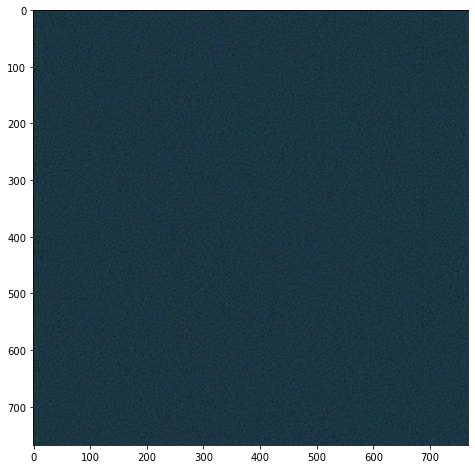

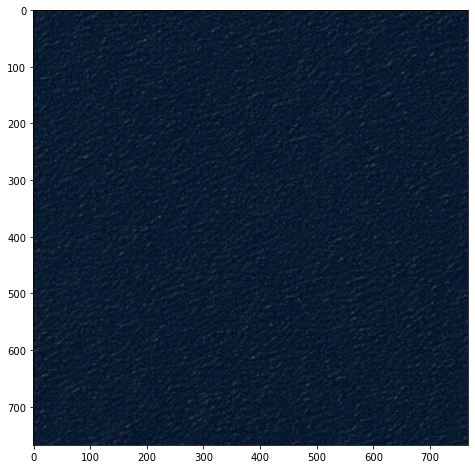

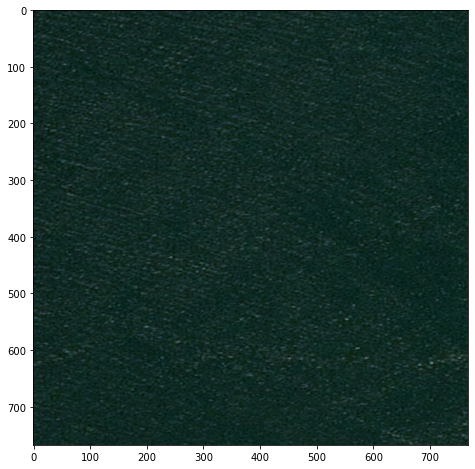

In [73]:
from object_detection.utils import visualization_utils as vis_util
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)